# Redes neurais

* Grosso modo, redes neurais são funções $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$ com um determinado tipo de estrutura.

* Nesse ponto, não são diferentes de polinômios, cuja estrutura é a de combinação linear de monômios: $f(x) = a_0 + a_1x + \ldots + a_k x^k$. 

* Ou de polinômios senoidais, cuja estrutura é a de combinação linear de senos e/ou cossenos com frequências e fases variadas: $f(t) = a_1\sin(\theta_1 + \omega_1 t) + \ldots + a_k\sin(\theta_k + \omega_k t)$.

* Uma das redes neurais mais simples que podemos considerar é a rede de camadas **densas**, formada pela composição de funções da forma
$$
x \mapsto g(Wx + b),
$$
onde g : \mathbb{R} \rightarrow \mathbb{R}$ é chamada de **função de ativação**, $W$ é chamado de **peso** e $b$, de **viés**.

* Podemos ter $x$, $W$ e $b$ escalares ou, mais geralmente, $x$ e $b$ podem ser vetores e $W$, uma matriz. Nesse caso, $g$ age em cada elemento do vetor $Wx + b$, gerando um vetor de mesma dimensão.

* Há vários pacotes Julia para faciliar a construção e o treinamento de redes neurais. O mais conhecido e utilizado deles é o [Flux.jl](https://github.com/FluxML/Flux.jl).

In [1]:
using LinearAlgebra: ⋅
using Flux
using Plots
using ChainPlots

## Perceptron com dois sinais de entrada

* Vamos começar com um **percetron**, o *bloco-construtor* da rede neural de perceptrons originalmente proposta por [Frank Rosemblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt), nos anos 1950-1960.

* Pra começar, um **perceptron de duas entradas** é uma função que recebe dois sinais (valores) $x_1$ e $x_2$ e que, de acordo com **pesos** $w_1, w_2$ e de um **limiar** $r$, retorna um valor $0$ ou $1$.

* A regra associada a esses parâmetros é
$$
  \text{saída} = 
    \begin{cases}
      0, & \displaystyle \text{se } w_1x_1 + w_2x_2 \leq r, \\
      1, & \displaystyle \text{se }  w_1x_1 + w_2x_2 > r.
    \end{cases}
$$

* Ou seja, o *neurônio* é **ativado** se o sinal ponderado $w_1x_1 + w_2x_2$ está **acima do limiar**, caso contrário, ele não é ativado.

## Perceptrons com múltiplos sinais de entrada

* Isso pode ser generalizado para um número arbitrário de sinais de entrada $x_1,\ldots,x_n$, com pesos $w_1, \ldots, w_n$.

* E atualmente se usa $b=-r$, denominado **viés**, de forma que o sinal de saída fica sendo
$$
  \text{saída} = 
    \begin{cases}
      0, & \displaystyle \text{se } \sum_{i=1}^n w_ix_i + b \leq 0, \\
      1, & \displaystyle \text{se }  \sum_{i=1}^n w_ix_i + b > 0.
    \end{cases}
$$

* Isso pode ser escrito de uma forma mais compacta com uma **função de ativação**
$$ h(s) = \max\{0,\operatorname{sgn}(x)\} = \begin{cases} 1, & s>0 \\ 0, & s\leq 0 \end{cases}
$$

* E com um **matriz de pesos**
$$
W = \left[w_1 w_2 \ldots w_n\right] \in \mathbb{R}^{1 \times n}.
$$

* Assim,
$$ \text{saída} = h\left(w_1x_1 + \ldots + w_nx_n + b\right) = h\left(Wx + b\right).
$$

## Implementando um perceptron em Julia

* Um perceptron pode ser facilmente implementado em `julia`:

In [33]:
n = 2                      # número de entradas
W = [0.6 0.8]              # pesos
b = 1.0                    # viés
h(s) = ifelse(s>0.0, 1.0, 0.0)   # função de ativação

l(x, h, W, b) = h.(W * x .+ b)         # perceptron

l (generic function with 1 method)

* A função de ativação tem uma forma "escada":

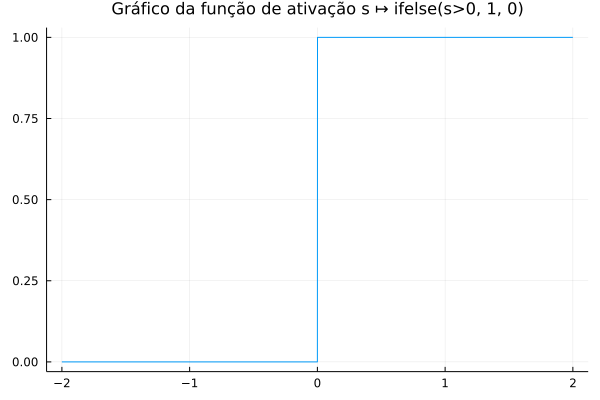

In [34]:
plot(-2:0.001:2, h, legend=false,
    title="Gráfico da função de ativação s ↦ ifelse(s>0, 1, 0)", titlefont=11)

* Com o peso ponderado, temos um comportamento análogo, só que em multi-dimensional:

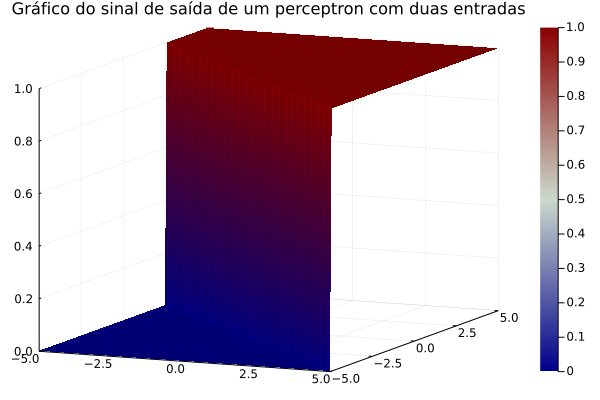

In [36]:
surface(-5:0.1:5, -5:0.1:5, (x,y) -> l([x,y], h, W, b)[1], c=:bluesreds,
    title="Gráfico do sinal de saída de um perceptron com duas entradas",
    titlefont=11)

## Redes de perceptrons.

* A função de ativação do perceptron é perfeita para representar circuitos digitais.
* De fato, redes de perceptrons podem ser estruturadas para fazer qualquer operação booleana (AND, NOT, OR, XOR, NAND, etc...)
* E junto com isso, qualquer operação aritmética binária (adição, subtração, multiplicação, divisão).
* Redes de perceptrons são obtidas encadeando-se diversos perceptrons como acima, com uma ou mais entradas.
* Mas isso deve ser construído explicitamente.
* Redes de perceptrons não são boas de se *treinar* (i.e. ajustar os parâmetros $W$ e $b$, ou outros em redes mais complexas)
* De fato, sendo a função de ativação constante por partes, o seu gradiente é nulo quase sempre, então não podemos utilizar métodos clássicos de otimização. Métodos livres de derivada funcionam, mas perde-se muito em eficiência, principalmente ao se treinar redes com dezenas, centenas, milhares, bilhões ou trilhões de parâmetros.
* Vale mencionar que o [Deep Blue](https://en.wikipedia.org/wiki/Deep_Blue_(chess_computer)), um sistema para jogar xadrez desenvolvido há quase trinta anos pela [IBM](https://en.wikipedia.org/wiki/IBM) e que venceu o grande campeão mundial [Garry Kasparov](https://en.wikipedia.org/wiki/Garry_Kasparov), possuia mais de oito mil parâmetros.
* Atualmente, há redes neurais com trilhões de parâmetros (e.g. [Mythbusting Google’s New Trillion-Parameter AI Language Model](https://www.hyro.ai/post/mythbusting-googles-new-trillion-parameter-ai-language-model)).
* Para resolver isso, precisamos de funções de ativação suaves.

## Outras funções de ativação

* Há várias outras funções de ativação comumente utilizadas, com as características de
    * ser suave;
    * variar entre um sinal de saída "baixo" e um "alto"."
* Podemos definir essas funções explicitamente, ou pegar emprestado diretamente do `Flux.jl`.
* Aqui a lista de [funções de ativação](https://fluxml.ai/Flux.jl/stable/models/nnlib/#Activation-Functions-1) definidas no pacote [FluxML/NNlib.jl](https://github.com/FluxML/NNlib.jl) e utilizadas (reexportadas) pelo `Flux.jl`.
* Podemos acessar os códigos de implementação dessas funções de ativação em [NNlib.jl/src/activations.jl](https://github.com/FluxML/NNlib.jl/blob/master/src/activations.jl).
* A lista delas está acessível na constante `NNlib.ACTIVATIONS`:

In [6]:
NNlib.ACTIVATIONS

24-element Vector{Symbol}:
 :σ
 :hardσ
 :hardtanh
 :relu
 :leakyrelu
 :relu6
 :rrelu
 :elu
 :gelu
 :swish
 ⋮
 :logσ
 :logcosh
 :mish
 :tanhshrink
 :softshrink
 :trelu
 :lisht
 :tanh_fast
 :sigmoid_fast

* Uma das mais conhecidas é a sigmoid:
$$ σ(x) = \frac{1}{1 + \exp(-x)}.
$$

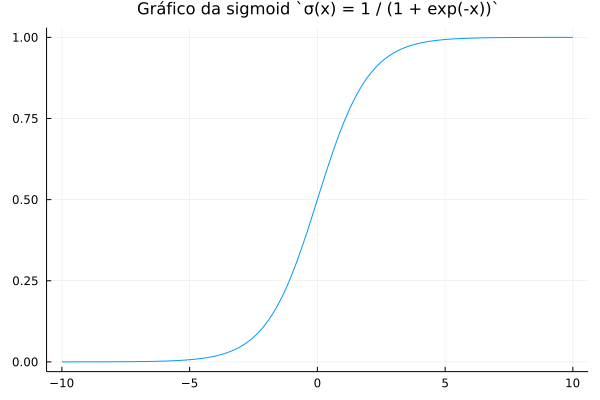

In [7]:
plot(-10:0.1:10, NNlib.σ, legend=false,
    title="Gráfico da sigmoid `σ(x) = 1 / (1 + exp(-x))`", titlefont=11)

## Visualizando todas as funções de ativação

In [8]:
ativacoes = hcat([getproperty(NNlib, ativacao).(-10:0.1:10) for ativacao in NNlib.ACTIVATIONS[1:end]]...)

201×24 Matrix{Float64}:
 4.53979e-5   0.0  -1.0   0.0  -0.1    …  -9.5   0.0  10.0  -1.0  4.53979e-5
 5.01722e-5   0.0  -1.0   0.0  -0.099     -9.4   0.0   9.9  -1.0  5.01722e-5
 5.54485e-5   0.0  -1.0   0.0  -0.098     -9.3   0.0   9.8  -1.0  5.54485e-5
 6.12797e-5   0.0  -1.0   0.0  -0.097     -9.2   0.0   9.7  -1.0  6.12797e-5
 6.77241e-5   0.0  -1.0   0.0  -0.096     -9.1   0.0   9.6  -1.0  6.77241e-5
 7.48462e-5   0.0  -1.0   0.0  -0.095  …  -9.0   0.0   9.5  -1.0  7.48462e-5
 8.27172e-5   0.0  -1.0   0.0  -0.094     -8.9   0.0   9.4  -1.0  8.27172e-5
 9.14159e-5   0.0  -1.0   0.0  -0.093     -8.8   0.0   9.3  -1.0  9.14159e-5
 0.000101029  0.0  -1.0   0.0  -0.092     -8.7   0.0   9.2  -1.0  0.000101029
 0.000111653  0.0  -1.0   0.0  -0.091     -8.6   0.0   9.1  -1.0  0.000111653
 ⋮                                     ⋱         ⋮                
 0.999899     1.0   1.0   9.2   9.2        8.7   9.2   9.2   1.0  0.999899
 0.999909     1.0   1.0   9.3   9.3        8.8   9.3   9.3   1

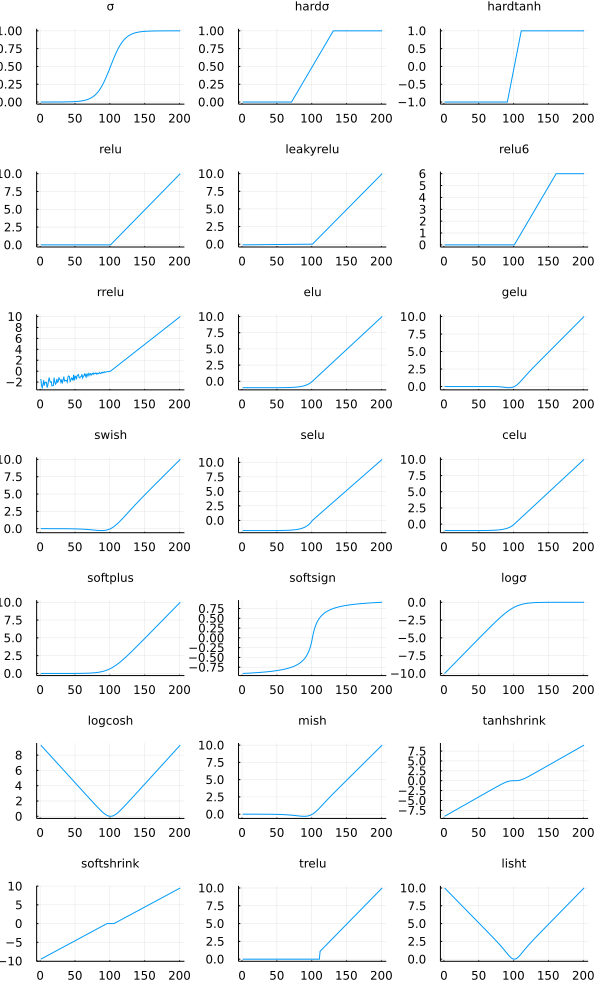

In [8]:
ncols = 3
nlinhas = divrem(length(NNlib.ACTIVATIONS), ncols) |> drn -> drn[1] + sign(drn[2])
plot(ativacoes, layout = grid(nlinhas, ncols), legend=false, size=(600,1000),
    title=hcat(NNlib.ACTIVATIONS...), titlefont=8)

## Outros neurônios

* Podemos compor uma função de ativação $f:\mathbb{R}\rightarrow \mathbb{R}$ qualquer...

* ... com a média ponderada $w_1x_1 + \ldots + w_nx_n$ dos sinais de entrada ...

* ... para formar um neurônio
$$ (x_1, \ldots, x_n) \mapsto f(w_1x_1 + \ldots + w_nx_n).
$$

* Isso pode ser feito explicitamente como acima.

* Ou com o `Dense()` do `Flux.jl`.

In [11]:
n = 2
m = Dense(n, 1)

Dense(2 => 1)       # 3 parameters

## Visualização da rede

* A visualização dessa rede pode ser feita com o pacote [ChainPlots.jl](https://github.com/rmsrosa/ChainPlots.jl).

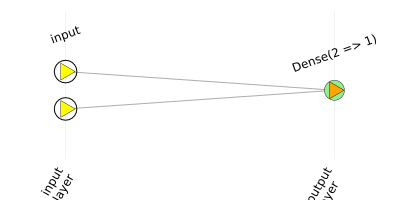

In [12]:
plot(m, size=(400, 200))

## Sobre o `Dense`

* `Dense` é um conjunto de "coisas", de acordo com a filosofia de *múltiplo despachos* do julia.

* `Dense` é um **struct** (ou "tipo composto"), que armazena uma *matriz de pesos*, o *viés* e *função de ativação*, representando, assim, um tipo de neurônio.

* `Dense` são vários **inner and outer constructors** (ou "construtores internos e externos"), que servem para criar uma instância do *struct* `Dense` de maneiras diferentes.

* `Dense` também acarreta na definição de um método que "avalia" a ação de uma instância do struct nos sinais de entrada (a ação do neurônio em si).

In [13]:
fieldnames(Dense) # nomes dos campos do tipo composto 

(:weight, :bias, :σ)

In [14]:
methods(Dense) # métodos para a construção do tipo composto

# 7 methods for type constructor:
[1] Dense(in::Integer, out::Integer) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/deprecations.jl:63
[2] Dense(in::Integer, out::Integer, σ; kw...) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/deprecations.jl:63
[3] Dense(::Pair{<:Integer, <:Integer}) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:150
[4] Dense(::Pair{<:Integer, <:Integer}, σ; init, bias) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:150
[5] Dense(W::M) where M<:(AbstractMatrix) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:144
[6] Dense(W::M, bias) where M<:(AbstractMatrix) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:144
[7] Dense(W::M, bias, σ::F) where {M<:(AbstractMatrix), F} in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:144

In [15]:
methods(m) # métodos definidos 

# 2 methods:
[1] (a::Dense)(x::AbstractVecOrMat) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:157
[2] (a::Dense)(x::AbstractArray) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:162

In [16]:
methodswith(Dense)

[1] show(io::IO, l::Dense) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/basic.jl:165
[2] show(io::IO, m::MIME{Symbol("text/plain")}, x::Dense) in Flux at /Users/rrosa/.julia/packages/Flux/6Q5r4/src/layers/show.jl:61

In [28]:
Docs.doc(Dense)

```
Dense(in => out, σ=identity; bias=true, init=glorot_uniform)
Dense(W::AbstractMatrix, [bias, σ])
```

Create a traditional fully connected layer, whose forward pass is given by:

```
y = σ.(W * x .+ bias)
```

The input `x` should be a vector of length `in`, or batch of vectors represented as an `in × N` matrix, or any array with `size(x,1) == in`. The out `y` will be a vector  of length `out`, or a batch with `size(y) == (out, size(x)[2:end]...)`

Keyword `bias=false` will switch off trainable bias for the layer. The initialisation of the weight matrix is `W = init(out, in)`, calling the function given to keyword `init`, with default [`glorot_uniform`](@doc Flux.glorot_uniform). The weight matrix and/or the bias vector (of length `out`) may also be provided explicitly.

# Examples

```jldoctest
julia> d = Dense(5 => 2)
Dense(5 => 2)       # 12 parameters

julia> d(rand(Float32, 5, 64)) |> size
(2, 64)

julia> d(rand(Float32, 5, 1, 1, 64)) |> size  # treated as three batch dimensions
(2, 1, 1, 64)

julia> d1 = Dense(ones(2, 5), false, tanh)  # using provided weight matrix
Dense(5 => 2, tanh; bias=false)  # 10 parameters

julia> d1(ones(5))
2-element Vector{Float64}:
 0.9999092042625951
 0.9999092042625951

julia> Flux.params(d1)  # no trainable bias
Params([[1.0 1.0 … 1.0 1.0; 1.0 1.0 … 1.0 1.0]])
```


In [16]:
@which Dense(2,1)

Dense(in::Integer, out::Integer) in Flux at /Users/rrosa/.julia/packages/Flux/qp1gc/src/layers/basic.jl:122

* Código fonte para `Flux.Dense` em [src/basic.jl#L71](https://github.com/FluxML/Flux.jl/blob/master/src/layers/basic.jl#L71), no repositório do `Flux.jl`.

## Diferenças sobre a nossa implementação

* A nossa definição foi

```julia
l(x, h, W, b) = h.(W⋅x .+ b)
```

* A definição para uma instância do `Dense` é (obtido de [src/basic.jl#L71](https://github.com/FluxML/Flux.jl/blob/master/src/layers/basic.jl#L71))

```julia
function (a::Dense)(x::AbstractVecOrMat)
  W, b, σ = a.weight, a.bias, a.σ
  return σ.(W*x .+ b)
end
```

* **Observação 1:** No *struct* do dense, `σ` é o nome do campo que guarda a função de ativação do neurônio, que pode ser qualquer uma, não apenas a sigmóide `σ`, importada de `NNLib.σ`.

* **Observação 2:** Veja o uso da operação matricial `W*x` e do operador `.`, que permitem aplicar o neurônio em uma matriz, como em lotes.

* **Observação 3:** Por conta dessas últimas, a saída do neurônio é um vetor, não um escalar, mesmo que seja de um único elemento.

<!--NAVIGATOR-->

---
[<- 2. Primeiros passos em Julia](02.00-Primeiros_passos_Julia.ipynb) | [Página inicial](00.00-Pagina_inicial.ipynb) | [4. Redes neurais no Flux ->](04.00-Flux_redes_neurais.ipynb)